# Лабораторная работа 2

Классификация, оценка точности классификации.

Набор базовых данных о биологических сигналах здоровья.
Цель состоит в том, чтобы определить наличие или отсутствие курения с помощью биосигналов.

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

/var/folders/v5/wkst9gs13v9dm3ny0nx3d9qr0000gn/T/ipykernel_5821/4175973121.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./smoking_5000.csv', delimiter=',', encoding='utf8')
del dfInit["ID"]
df = dfInit.copy(deep=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F,40,145,50,65.6,1.2,1.2,1.0,1.0,108.0,64.0,91.0,192.0,55.0,88.0,93.0,13.8,1.0,0.9,19.0,11.0,13.0,Y,0,N,0
4996,M,30,175,60,81.0,1.0,1.2,1.0,1.0,119.0,70.0,93.0,145.0,65.0,55.0,77.0,14.9,1.0,1.1,18.0,13.0,27.0,Y,0,Y,0
4997,F,60,145,40,72.0,0.3,0.6,1.0,1.0,136.0,80.0,101.0,211.0,146.0,52.0,130.0,12.5,1.0,0.5,23.0,16.0,12.0,Y,0,Y,0
4998,M,20,175,85,91.0,0.9,1.2,1.0,1.0,135.0,94.0,110.0,209.0,134.0,64.0,117.0,15.8,1.0,1.0,29.0,45.0,146.0,Y,1,N,1


#### Преобразование параметров

In [3]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
        
    print(f"{fieldName} = {dataDict}\n")

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [4]:
df.dropna(axis=0, inplace=True)

updateData(fieldName="gender")
updateData(fieldName="oral")
updateData(fieldName="tartar")

df

gender = {'F': 0, 'M': 1}

oral = {'Y': 0}

tartar = {'N': 0, 'Y': 1}



,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,40,145,50,65.6,1.2,1.2,1.0,1.0,108.0,64.0,91.0,192.0,55.0,88.0,93.0,13.8,1.0,0.9,19.0,11.0,13.0,0,0,0,0
4996,1,30,175,60,81.0,1.0,1.2,1.0,1.0,119.0,70.0,93.0,145.0,65.0,55.0,77.0,14.9,1.0,1.1,18.0,13.0,27.0,0,0,1,0
4997,0,60,145,40,72.0,0.3,0.6,1.0,1.0,136.0,80.0,101.0,211.0,146.0,52.0,130.0,12.5,1.0,0.5,23.0,16.0,12.0,0,0,1,0
4998,1,20,175,85,91.0,0.9,1.2,1.0,1.0,135.0,94.0,110.0,209.0,134.0,64.0,117.0,15.8,1.0,1.0,29.0,45.0,146.0,0,1,0,1


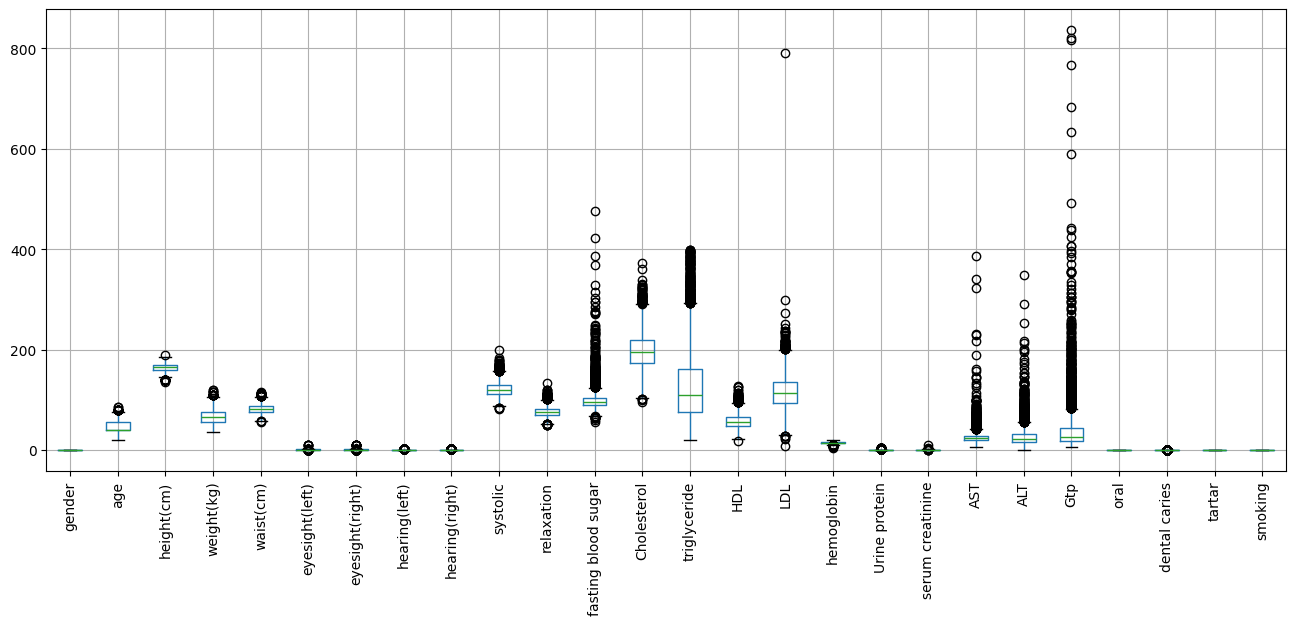

In [5]:
ax = df.boxplot(column=list(df.columns), figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax
plt.show()

#### Разделение на обучающие и тестовые данные

In [6]:
x = df.drop(['smoking'], axis=1)
y = df['smoking']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTraining = scaler.transform(xTraining)
xTest = scaler.transform(xTest)

In [8]:
labelEncoder = preprocessing.LabelEncoder()
yTrainingEncoded = labelEncoder.fit_transform(yTraining)

#### k-ближайших соседей

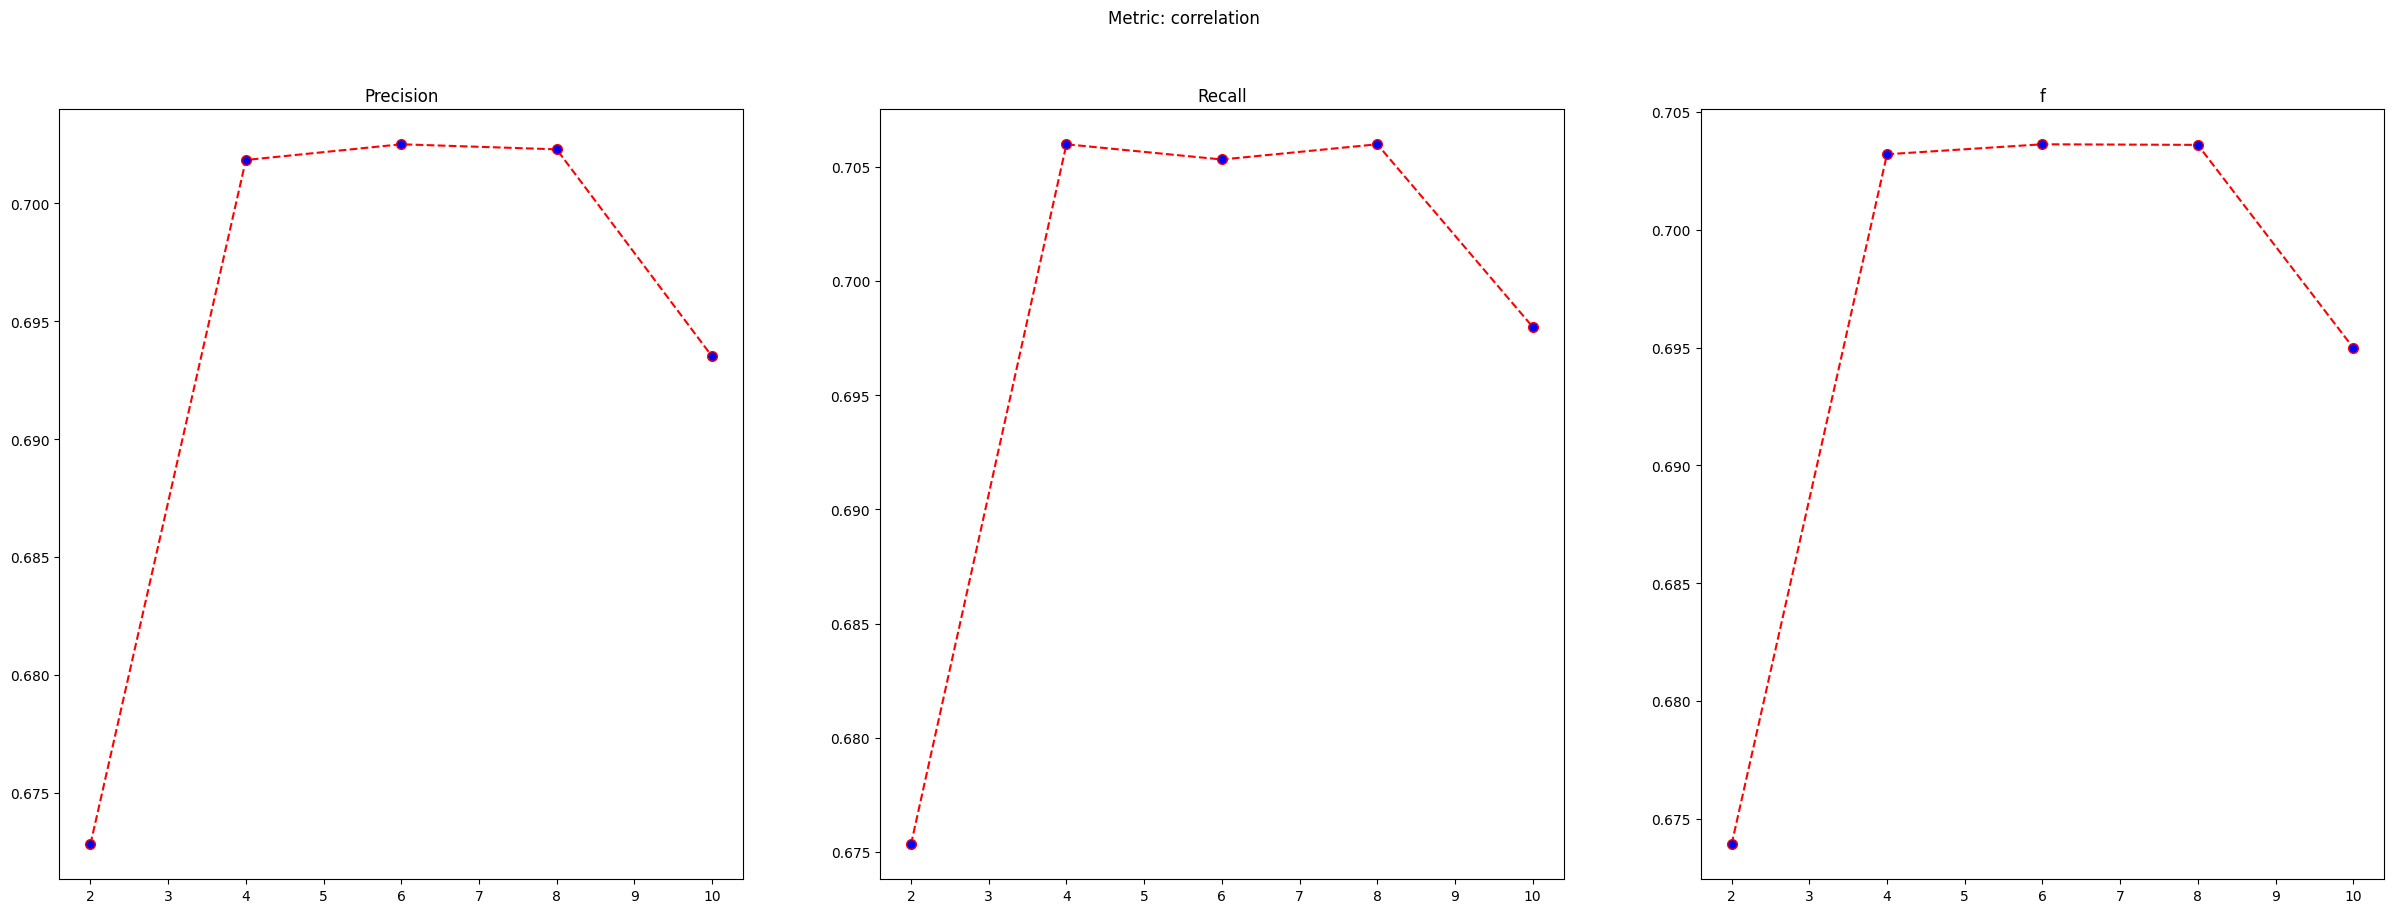

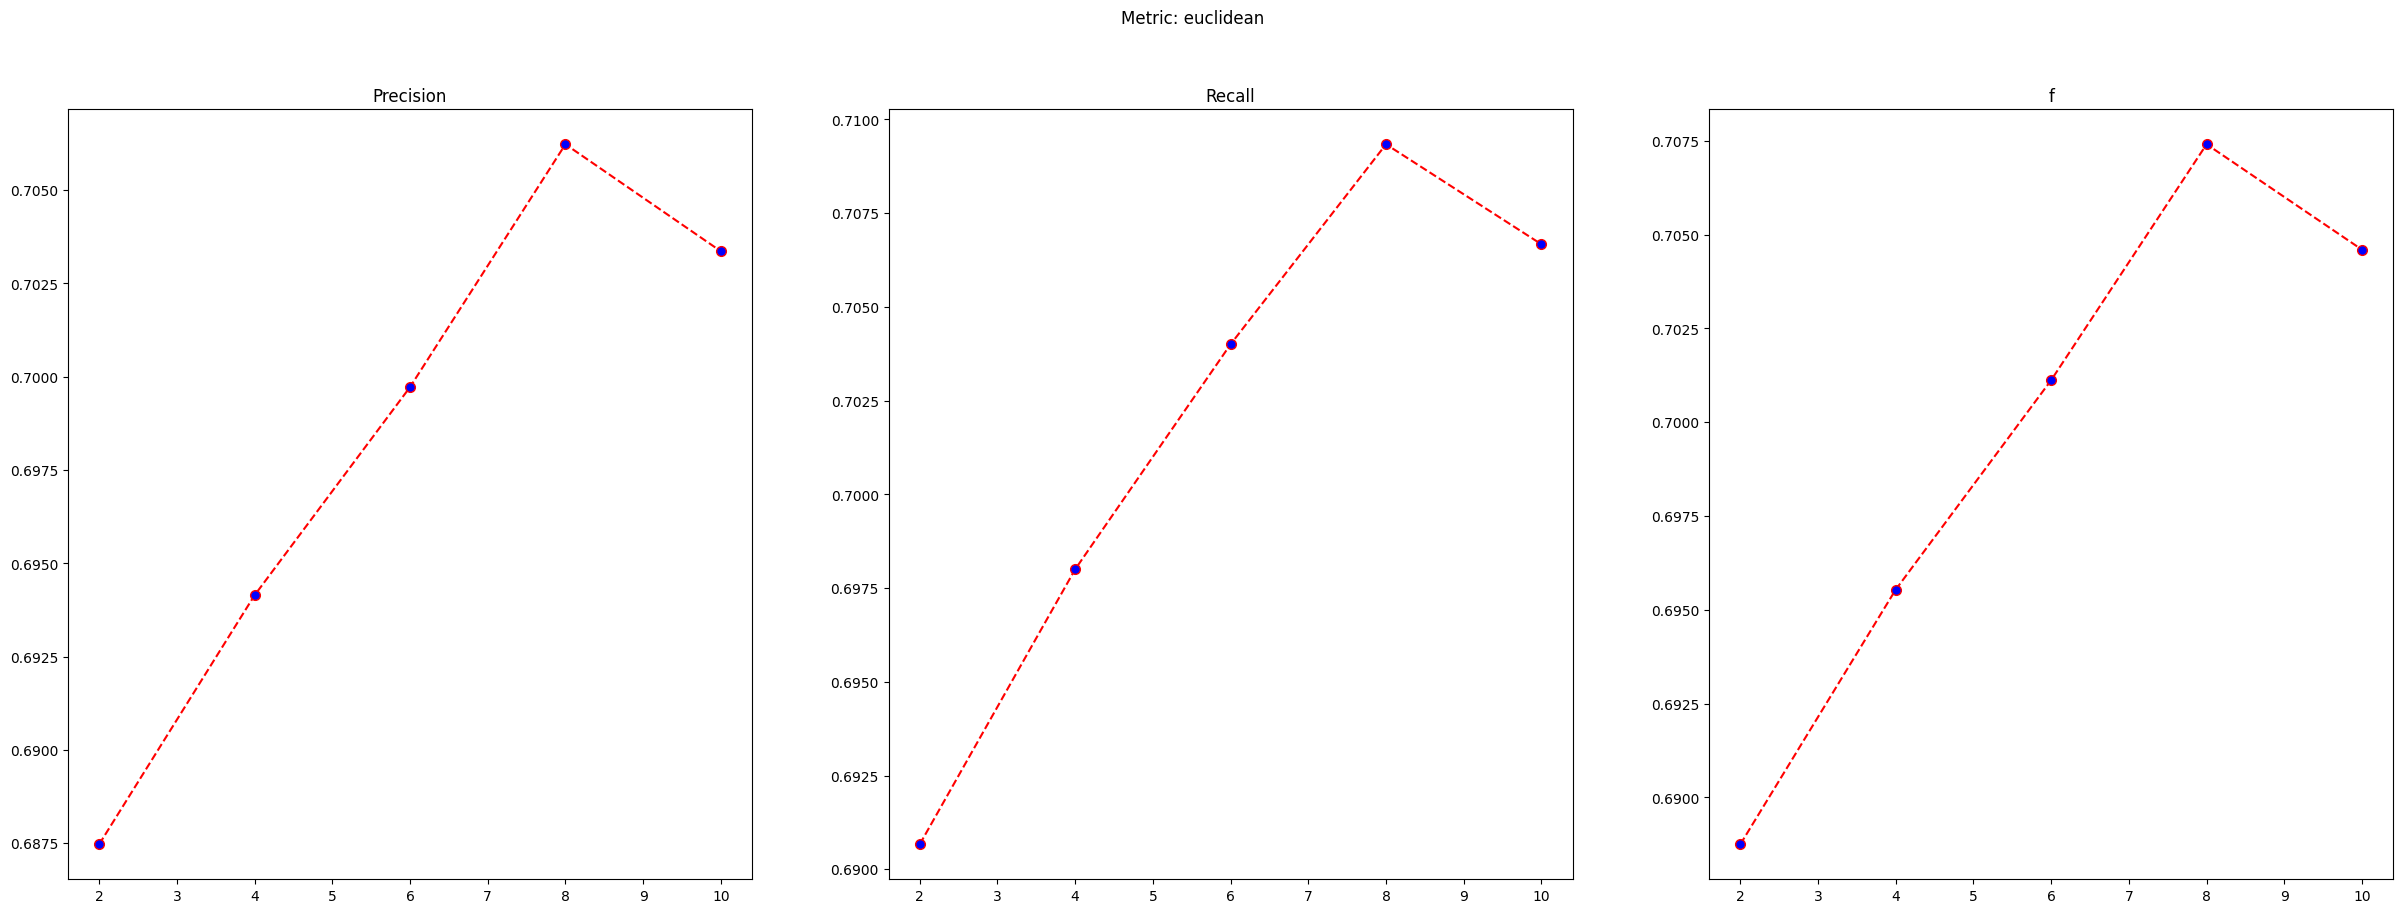

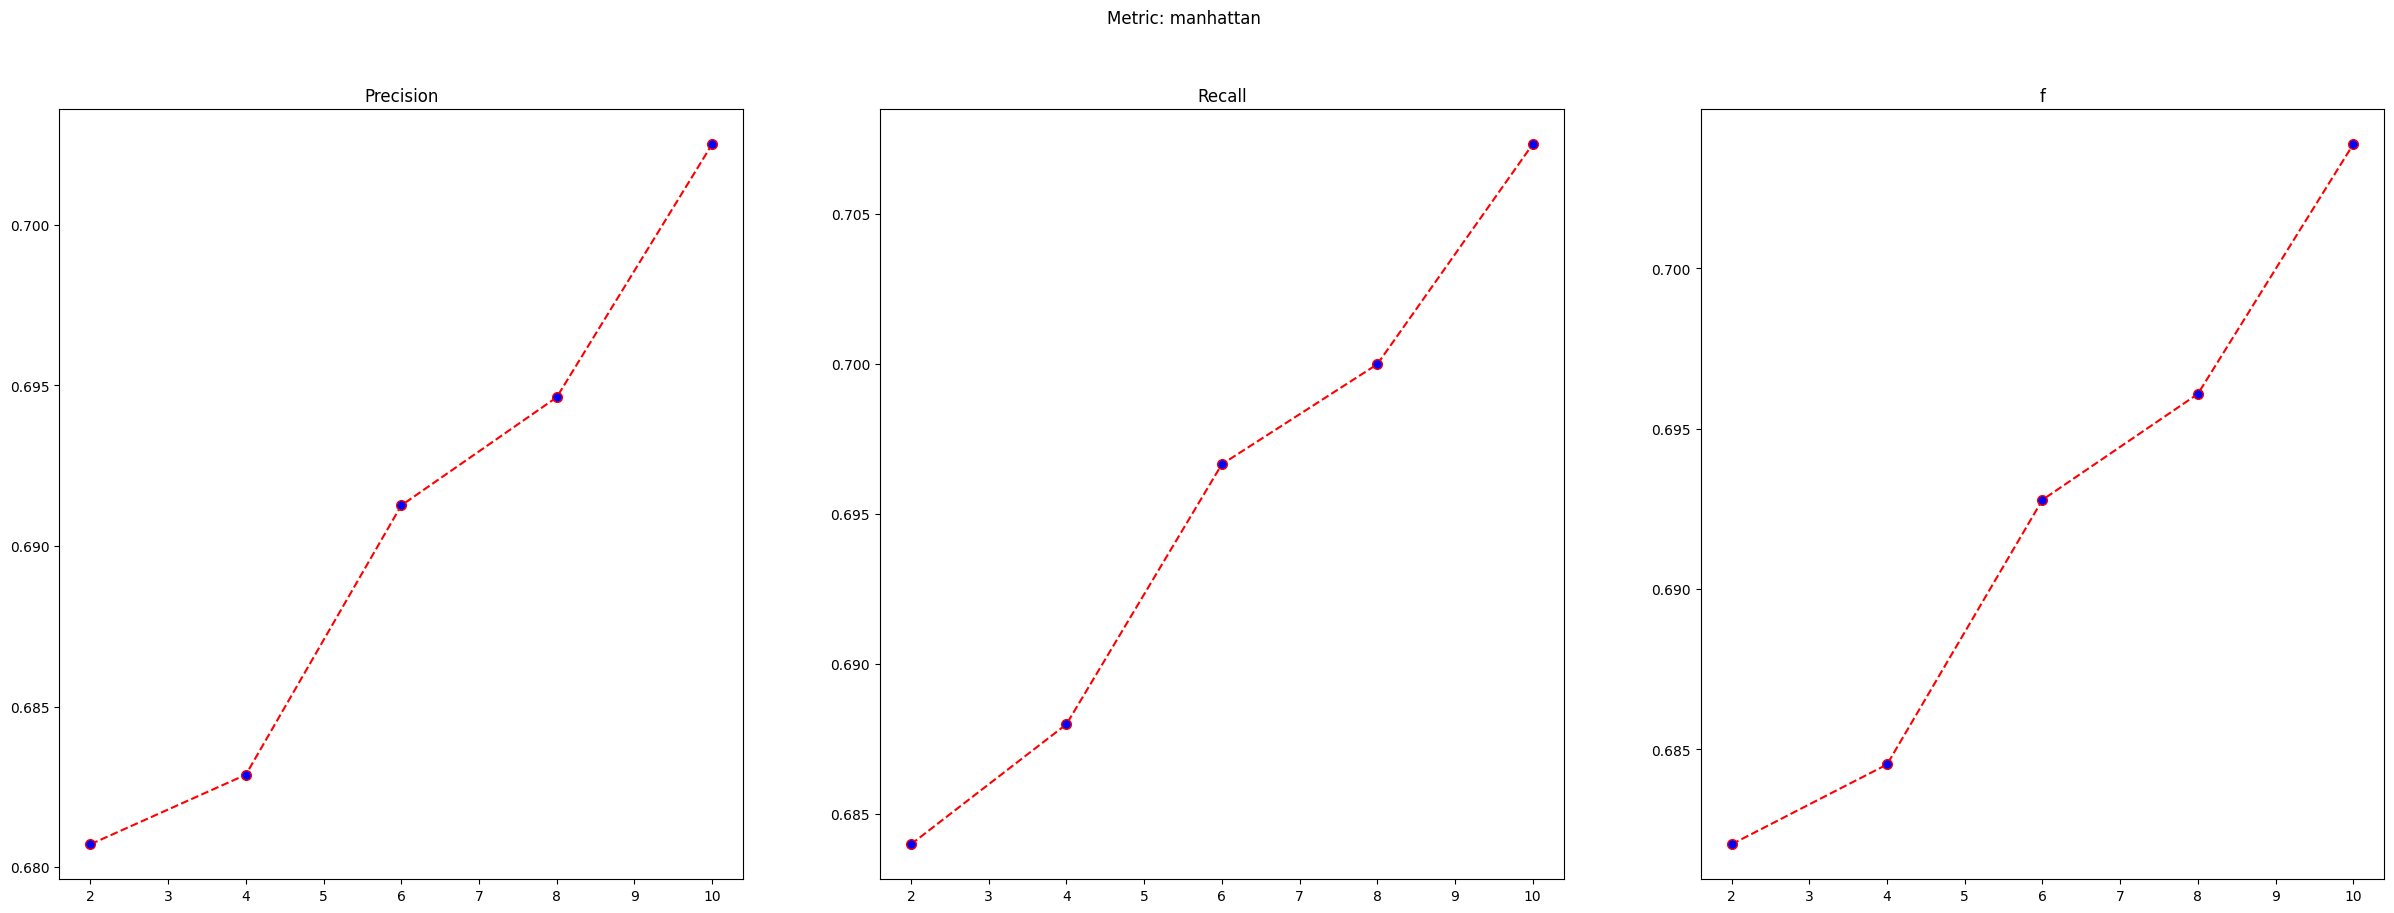

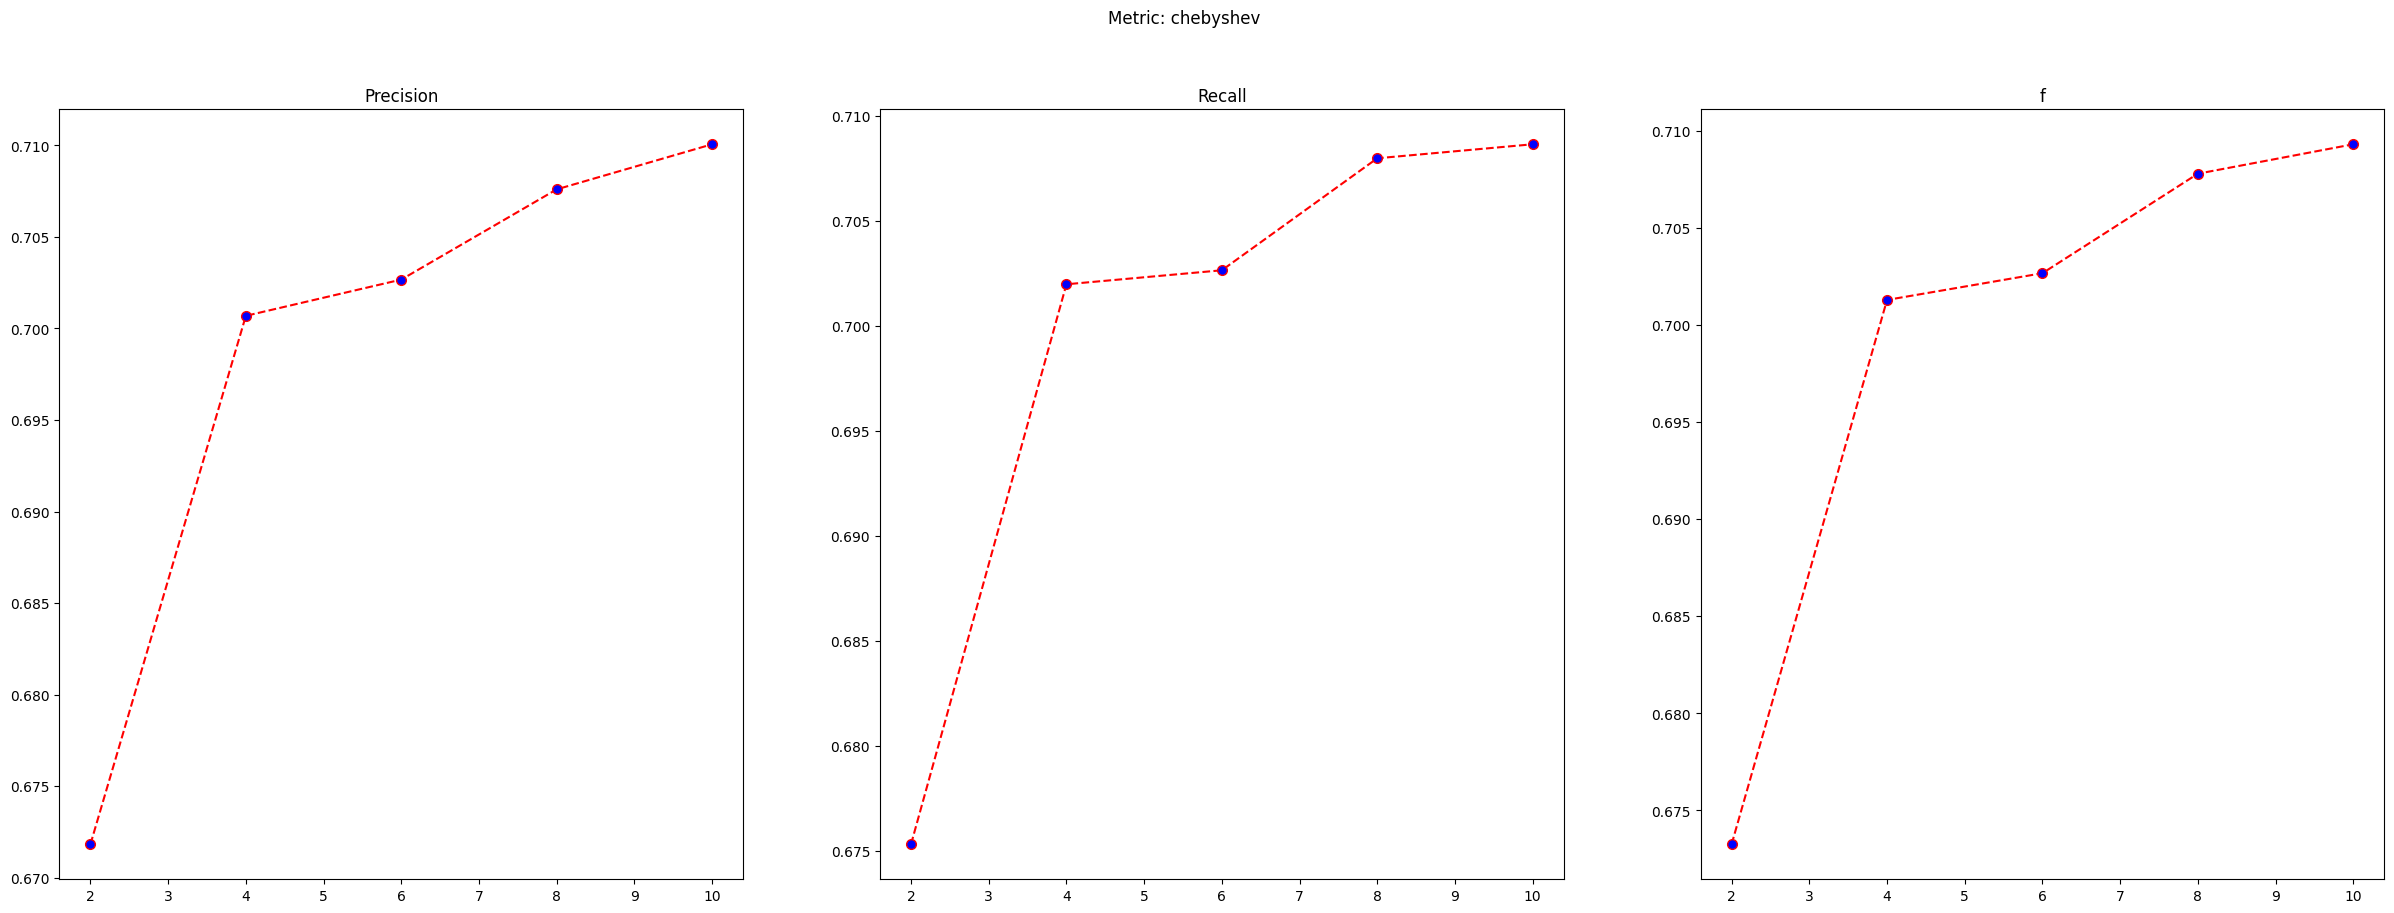

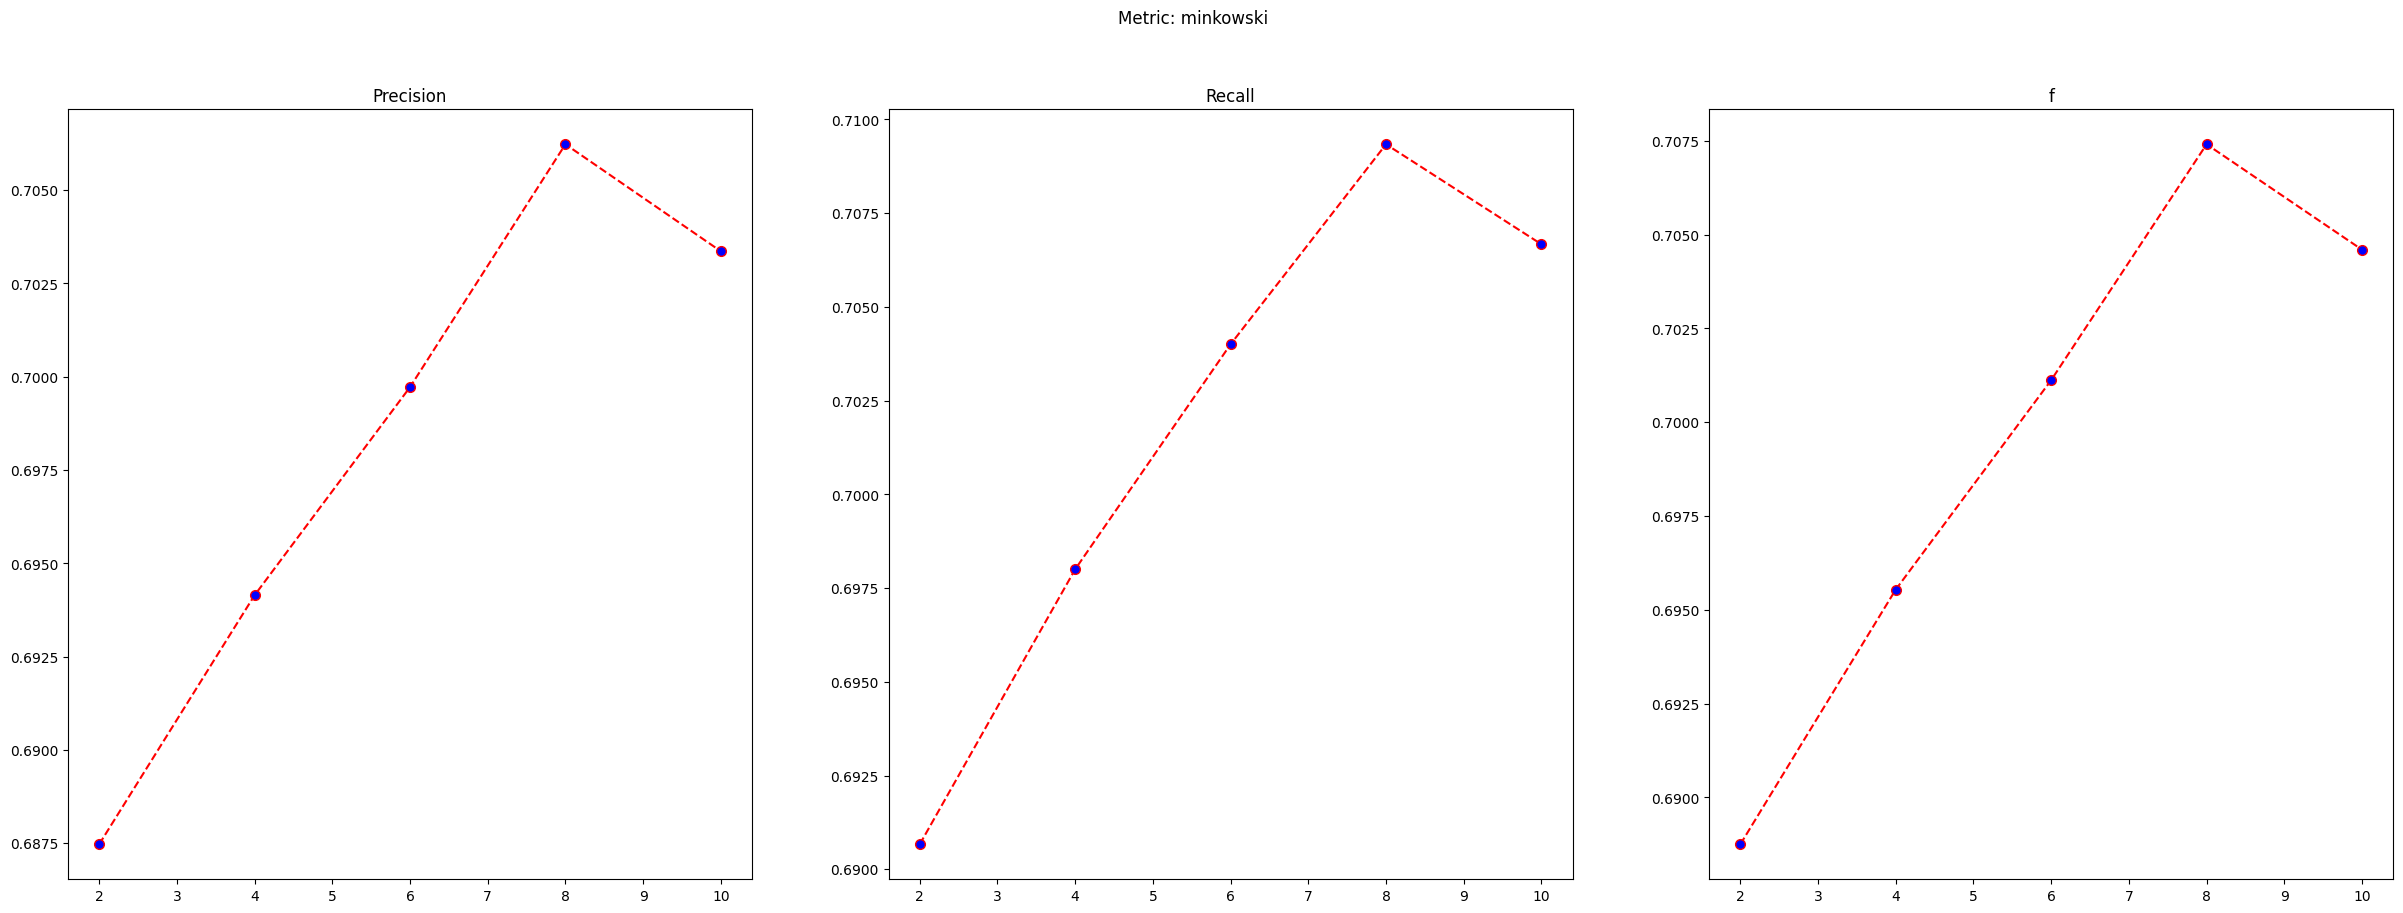

In [9]:
def doKNeightbors(m):
    precisionArr = []
    recallArr = []
    fArr = []

    neighborsRange = range(2, 12, 2)

    for i in neighborsRange:
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
        knn.fit(xTraining, yTraining)
        predict = knn.predict(xTest).tolist()

        metricsData = precision_recall_fscore_support(yTest, predict, average='weighted')

        precisionArr.append(np.average(metricsData[0]))
        recallArr.append(np.average(metricsData[1]))
        fArr.append(np.average(metricsData[2]))

    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    ax[0].plot(neighborsRange, precisionArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[1].plot(neighborsRange, recallArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[2].plot(neighborsRange, fArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)

    ax[0].set_title("Precision")
    ax[1].set_title("Recall")
    ax[2].set_title("f")

    fig.suptitle("Metric: " + m)

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
    doKNeightbors(m)

plt.show()

#### Матрица ошибок

In [10]:
smoking = df["smoking"].unique()
smoking.sort()
print(smoking)

[0 1]


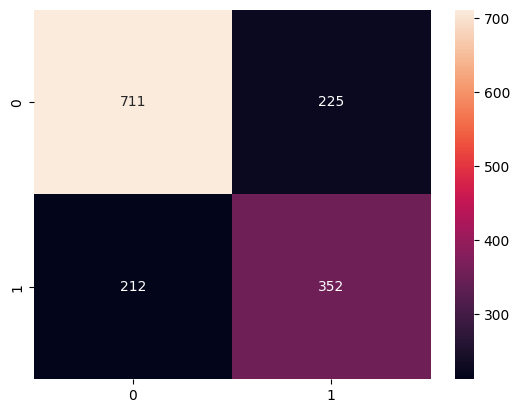

In [11]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='chebyshev')
knn.fit(xTraining, yTraining)
predictions = knn.predict(xTest).tolist()

confusionMatrix = confusion_matrix(yTest, predictions)
cm = pd.DataFrame(confusionMatrix, columns=smoking, index=smoking)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#### Метрики

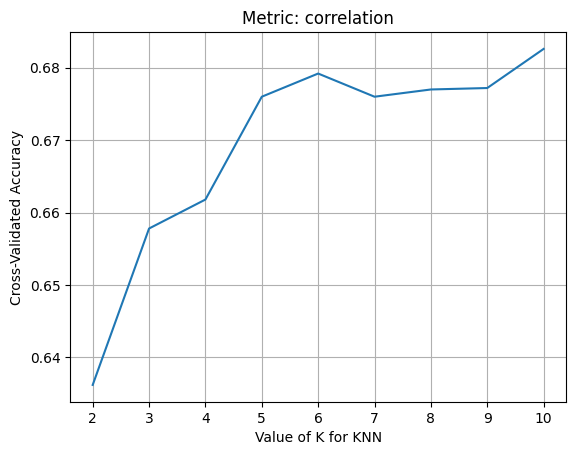

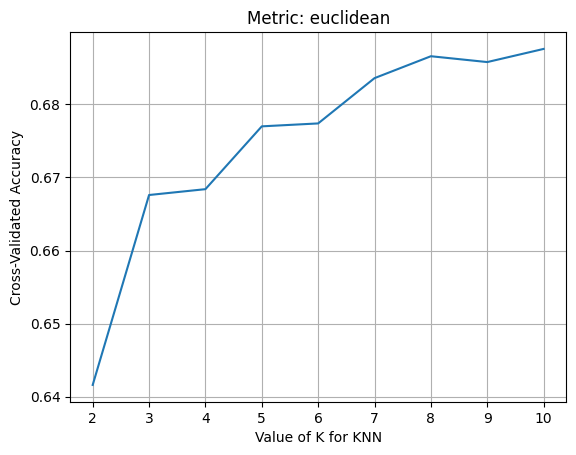

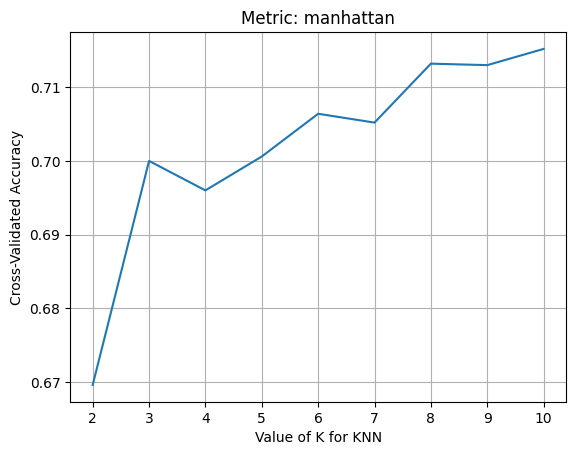

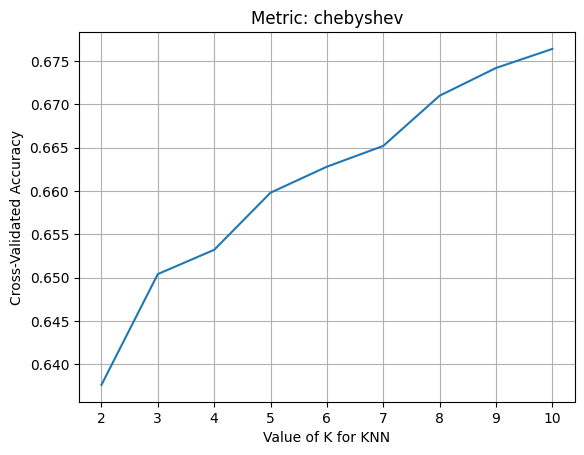

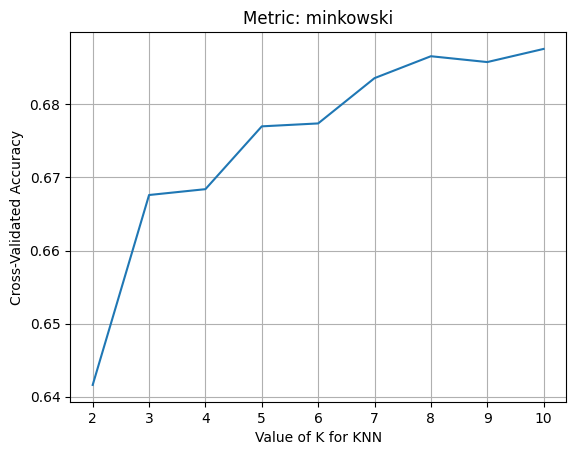

In [12]:
def doKNeightbors(m):
  kScores = []

  neighborsRange = range(2, 11)

  for i in neighborsRange:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
    kScores.append(cross_val_score(knn, df, y, cv=5, scoring='accuracy').mean())

  plt.plot(neighborsRange, kScores)
  plt.title("Metric: " + m)
  plt.xlabel('Value of K for KNN')
  plt.ylabel('Cross-Validated Accuracy')
  plt.grid()
  plt.show()

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
  doKNeightbors(m)

#### Деревья принятия решений

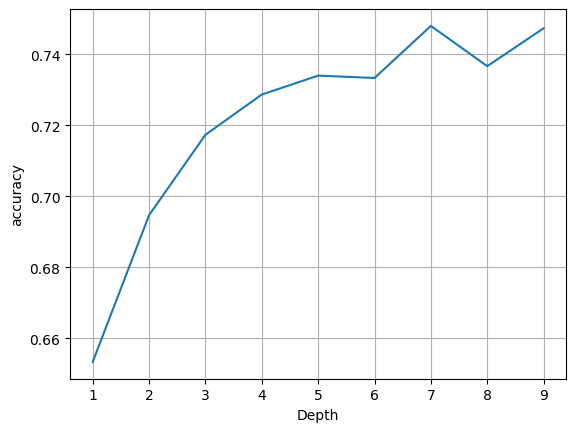

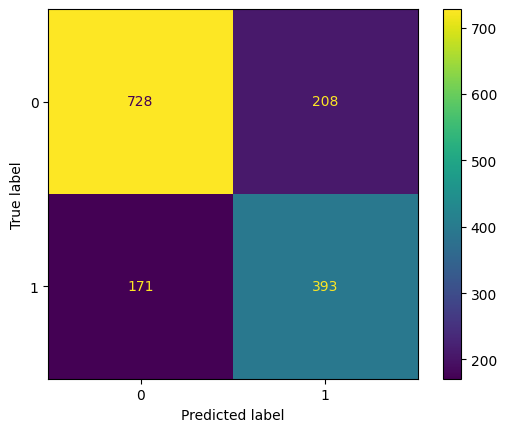

Max deep:  7
f1:  0.7487983160061279
Recall:  0.7473333333333333
Precision:  0.751178336439638


In [13]:
pltx = []
plty = []

for depth in range(1, 10):
    model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
    predictions = model.predict(xTest)
    plty.append(accuracy_score(yTest, predictions))
    pltx.append(depth)

plt.plot(pltx, plty)
plt.xlabel('Depth')
plt.ylabel('accuracy')
plt.grid()
plt.show()

maxDepth = pltx[plty.index(max(plty))]
ConfusionMatrixDisplay.from_estimator(estimator=model, X=xTest, y=yTest)
plt.show()

print("Max deep: ", maxDepth)
print("f1: ", f1_score(yTest, predictions, average='weighted'))
print("Recall: ", recall_score(yTest, predictions, average='weighted'))
print("Precision: ", precision_score(yTest, predictions, average='weighted'))

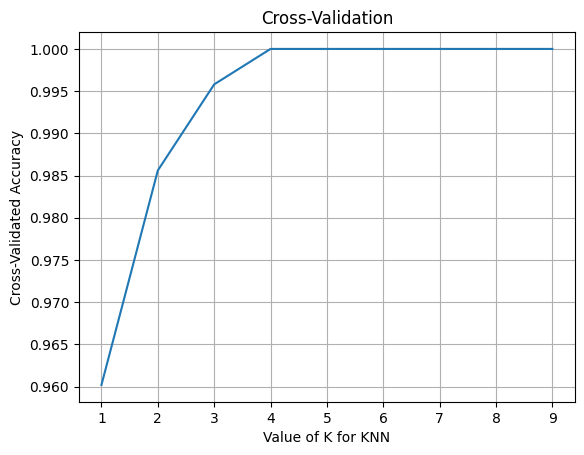

In [14]:
kScores = []
depthRange = range(1, 10)
for depth in depthRange:
  model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
  kScores.append(cross_val_score(model, df, y, cv=5, scoring='accuracy').mean())

plt.plot(depthRange, kScores)
plt.title("Cross-Validation")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()